# [참고] Pandas를 이용한 데이터분석 예제

### #학습목표 
- 공공 데이터를 이용하여 성씨 데이터를 표와 그래프로 나타낼 수 있다.

----------------------------------

## 공공데이터 사용하기

### #대한민국 성씨 데이터 다운로드하기

#### 국가통계포털 사이트  https://kosis.kr/index/index.do 
#### 성씨ㆍ본관별_인구__시군구_~.csv 다운로드하기
 - 지정폴더\data\성씨ㆍ본관별_인구__시군구_20221228094613.csv

### #라이브러리 설치하기
아래 코드를 실행하는 방법 : 마우스로 실행시킬 셀(cell) 또는 행을 선택한 후  화면 위 Run(run cell) 메뉴를 선택해서 실행한다. 

In [ ]:
# 데이터를 표 형태로 보여주는 데이터 분석 라이브러리
!pip install pandas

In [ ]:
# 수치 데이터 분석 라이브러리
!pip install numpy

In [ ]:
# 데이터를 다양한 그래프로 보여주는 시각화 라이브러리
!pip install matplotlib

In [36]:
# 워드클라우드용 라이브러리
!pip install wordcloud

### #라이브러리 설치 확인하기
아래 코드를 실행한 후 오류 메시지가 없으면 성공적으로 설치된 것입니다.

In [ ]:
import pandas  as pd
pd.__version__

In [ ]:
import numpy as np
np.__version__

In [ ]:
import matplotlib as plt
plt.__version__

---------------------------------------------

## 주제: 구씨를 찾아라!

### #파이썬으로 데이터 분석하는 순서
 [사전준비] 필요한 파이썬 라이브러리 설치하기
 [사전준비] 데이터 준비하기 : 웹 사이트에서 공공데이터 다운로드하기 
 1. 데이터 불러오기 : 파이썬으로 데이터 읽어서 표로 나타내기
 2. 데이터 전처리하기 : 필요한 데이터만 추출하기
 3. 데이터 시각화하기 : 데이터 그래프로 나타내기
 4. 데이터 저장하기 :  파일로 저장하기 

### 1. 데이터 불러오기 : 파이썬으로 데이터 읽어서 표로 나타내기
파일명(성씨ㆍ본관별_인구__시군구_~.csv)에서 뒷부분 숫자는 다운로드된 날짜의 시간정보로 선생님과 다를 수 있으니 자신이 다운로드 받은 파일명을 사용하면 됩니다. 

In [1]:
import pandas as pd

file = 'data/성씨ㆍ본관별_인구__시군구_20230102180807.csv'
df = pd.read_csv(file, encoding = 'cp949') #cp949: 윈도우OS 기본 인코딩 포맷
df

,"성씨, 본관별",행정구역별(시군구),2015
0,계,전국,49705663
1,계,서울특별시,9567196
2,계,부산광역시,3404667
3,계,대구광역시,2436770
4,계,인천광역시,2822601
...,...,...,...
2764,기타,전라북도,3482
2765,기타,전라남도,4172
2766,기타,경상북도,4248
2767,기타,경상남도,5711


### 2. 데이터 전처리하기 : 필요한 데이터만 추출하기

#### #컬럼이름 변경하기

In [2]:
# 현재 컬럼이름 출력하기
df.columns

Index(['성씨, 본관별', '행정구역별(시군구)', '2015'], dtype='object')

In [3]:
# 컬럼이름 변경하기
df.columns = ['성씨', '지역', '인구']
df.columns

Index(['성씨', '지역', '인구'], dtype='object')

#### #고유한 성씨만 출력하기

In [4]:
# 고유한 성씨(한자포함) 출력하기
set(df['성씨'])

{'가(賈)',
 '간(簡)',
 '갈(葛)',
 '감(甘)',
 '강(姜)',
 '강(康)',
 '견(甄)',
 '경(慶)',
 '경(景)',
 '계',
 '계(桂)',
 '고(高)',
 '공(孔)',
 '곽(郭)',
 '구(丘)',
 '구(具)',
 '국(鞠)',
 '권(權)',
 '금(琴)',
 '기(奇)',
 '기타',
 '길(吉)',
 '김(金)',
 '나(羅)',
 '남(南)',
 '남궁(南宮)',
 '노(盧)',
 '노(魯)',
 '단(段)',
 '당(唐)',
 '도(都)',
 '도(陶)',
 '동(董)',
 '두(杜)',
 '라(羅)',
 '류(柳)',
 '마(馬)',
 '맹(孟)',
 '명(明)',
 '모(牟)',
 '목(睦)',
 '문(文)',
 '민(閔)',
 '박(朴)',
 '반(潘)',
 '방(房)',
 '방(方)',
 '배(裵)',
 '백(白)',
 '범(范)',
 '변(卞)',
 '변(邊)',
 '복(卜)',
 '봉(奉)',
 '부(夫)',
 '빈(賓)',
 '사(史)',
 '사공(司空)',
 '상(尙)',
 '서(徐)',
 '서문(西門)',
 '석(昔)',
 '석(石)',
 '선(宣)',
 '선우(鮮于)',
 '설(?)',
 '설(薛)',
 '성(成)',
 '소(蘇)',
 '소(邵)',
 '손(孫)',
 '송(宋)',
 '승(承)',
 '시(施)',
 '시(柴)',
 '신(愼)',
 '신(申)',
 '신(辛)',
 '심(沈)',
 '안(安)',
 '양(梁)',
 '양(楊)',
 '어(魚)',
 '엄(嚴)',
 '여(余)',
 '여(呂)',
 '연(延)',
 '염(廉)',
 '예(芮)',
 '오(吳)',
 '옥(玉)',
 '온(溫)',
 '왕(王)',
 '용(龍)',
 '우(禹)',
 '원(元)',
 '위(魏)',
 '유(兪)',
 '유(劉)',
 '유(庾)',
 '유(柳)',
 '육(陸)',
 '윤(尹)',
 '은(殷)',
 '음(陰)',
 '이(李)',
 '인(印)',
 '임(任)',
 '임(林)',
 '장(張)',
 '장(章)'

In [5]:
# 고유한 성씨(한자포함) 총개수 출력하기
len(set(df['성씨']))

155

In [6]:
# 고유한 성씨 출력하기
set(name.split('(')[0] for name in set(df['성씨']) )

{'가',
 '간',
 '갈',
 '감',
 '강',
 '견',
 '경',
 '계',
 '고',
 '공',
 '곽',
 '구',
 '국',
 '권',
 '금',
 '기',
 '기타',
 '길',
 '김',
 '나',
 '남',
 '남궁',
 '노',
 '단',
 '당',
 '도',
 '동',
 '두',
 '라',
 '류',
 '마',
 '맹',
 '명',
 '모',
 '목',
 '문',
 '민',
 '박',
 '반',
 '방',
 '배',
 '백',
 '범',
 '변',
 '복',
 '봉',
 '부',
 '빈',
 '사',
 '사공',
 '상',
 '서',
 '서문',
 '석',
 '선',
 '선우',
 '설',
 '성',
 '소',
 '손',
 '송',
 '승',
 '시',
 '신',
 '심',
 '안',
 '양',
 '어',
 '엄',
 '여',
 '연',
 '염',
 '예',
 '오',
 '옥',
 '온',
 '왕',
 '용',
 '우',
 '원',
 '위',
 '유',
 '육',
 '윤',
 '은',
 '음',
 '이',
 '인',
 '임',
 '장',
 '전',
 '정',
 '제',
 '제갈',
 '조',
 '좌',
 '주',
 '지',
 '진',
 '차',
 '채',
 '천',
 '최',
 '추',
 '탁',
 '태',
 '팽',
 '편',
 '표',
 '피',
 '하',
 '한',
 '함',
 '허',
 '현',
 '형',
 '호',
 '홍',
 '황',
 '황보'}

In [7]:
# 고유한 성씨 총개수 출력하기
len(set(name.split('(')[0] for name in set(df['성씨']) ))

120

---------------------

#### # [성씨]가  '구'인 데이터 추출하기

In [8]:
# [성씨] 열에서 '구'가 포함된 데이터 출력하기
df[df['성씨'].str.contains('구')]

,성씨,지역,인구
247,구(丘),전국,15382
248,구(丘),서울특별시,3855
249,구(丘),부산광역시,162
250,구(丘),대구광역시,126
251,구(丘),인천광역시,974
252,구(丘),광주광역시,60
253,구(丘),대전광역시,1175
254,구(丘),울산광역시,110
255,구(丘),세종특별자치시,106
256,구(丘),경기도,4781


In [9]:
# [성씨] 열에서 '구'가 포함되고, [지역] 열에서 '전국' 제외하고 가져오기
df_goo = df[df['성씨'].str.contains('구') & (df['지역'] != '전국')]

df_goo

,성씨,지역,인구
248,구(丘),서울특별시,3855
249,구(丘),부산광역시,162
250,구(丘),대구광역시,126
251,구(丘),인천광역시,974
252,구(丘),광주광역시,60
253,구(丘),대전광역시,1175
254,구(丘),울산광역시,110
255,구(丘),세종특별자치시,106
256,구(丘),경기도,4781
257,구(丘),강원도,217


#### #데이터 그룹핑: ‘구’씨 성을 가진 데이터를 [지역]별로 [인구] 합계 출력하기

In [10]:
# '구'씨 데이터를 [지역]별 합계 구하기
# df_goo_group = df_goo.groupby('지역').sum()
df_goo_group = df_goo.groupby('지역').sum(numeric_only=False)

# 지역별 합계 데이터를 '인구' 크기순으로 정렬하기
df_goo_group = df_goo_group.sort_values(by = '인구', ascending = False)

df_goo_group

,성씨,인구
지역,,
경기도,구(丘)구(具),47572
서울특별시,구(丘)구(具),38857
경상남도,구(丘)구(具),20367
부산광역시,구(丘)구(具),17871
대구광역시,구(丘)구(具),15313
인천광역시,구(丘)구(具),12028
충청남도,구(丘)구(具),10061
경상북도,구(丘)구(具),10000
대전광역시,구(丘)구(具),6295


---------------------------

-----------------------------------

### 3. 데이터 시각화하기 : 데이터 그래프로 나타내기
- 색상 참고 :  https://matplotlib.org/stable/gallery/color/named_colors.html 

#### #막대 그래프로 시각화하기

In [11]:
df_goo_group.columns

Index(['성씨', '인구'], dtype='object')

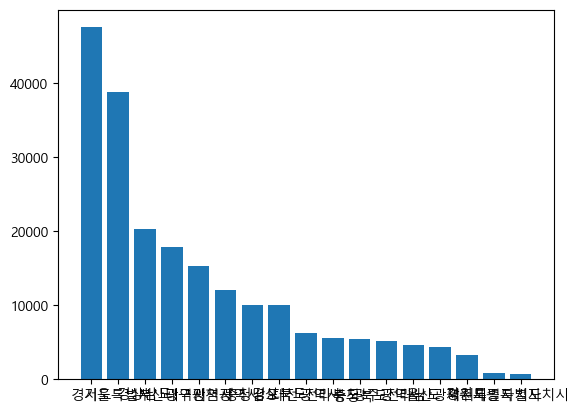

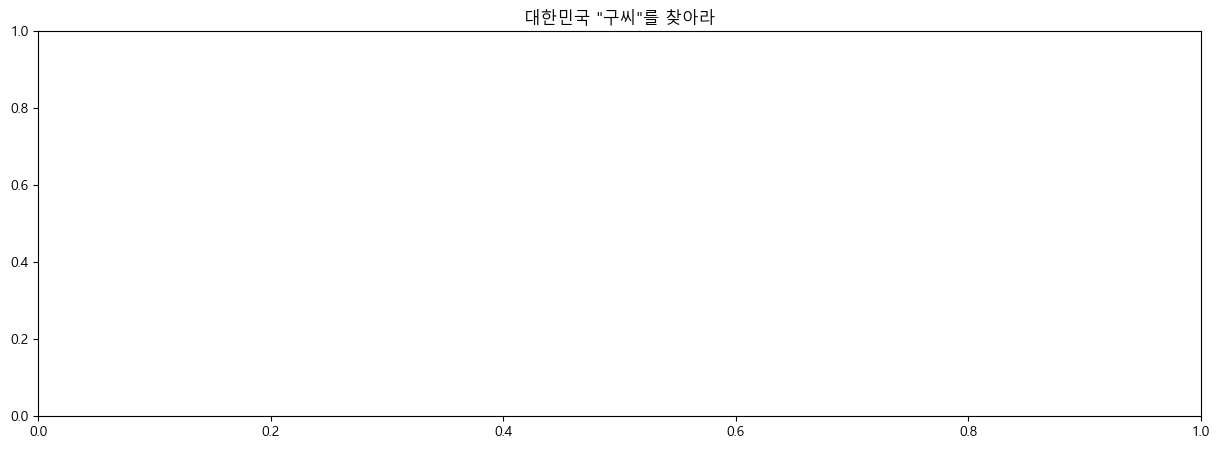

In [12]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 지정하기

# 1.그래프 데이터 지정하기(X축, Y축)
x = df_goo_group.index     # 지역
y = df_goo_group['인구']   # 인구수

# 2.그래프 그리기
plt.bar(x, y)

# 3. 그래프 꾸미기
plt.figure(figsize = (15, 5))         # 그래프 크기 (인치) 
                         # 막대 그래프
plt.title('대한민국 "구씨"를 찾아라') # 그래프 제목
plt.show()                            # 그래프 출력하기

#### #그래프 꾸미기

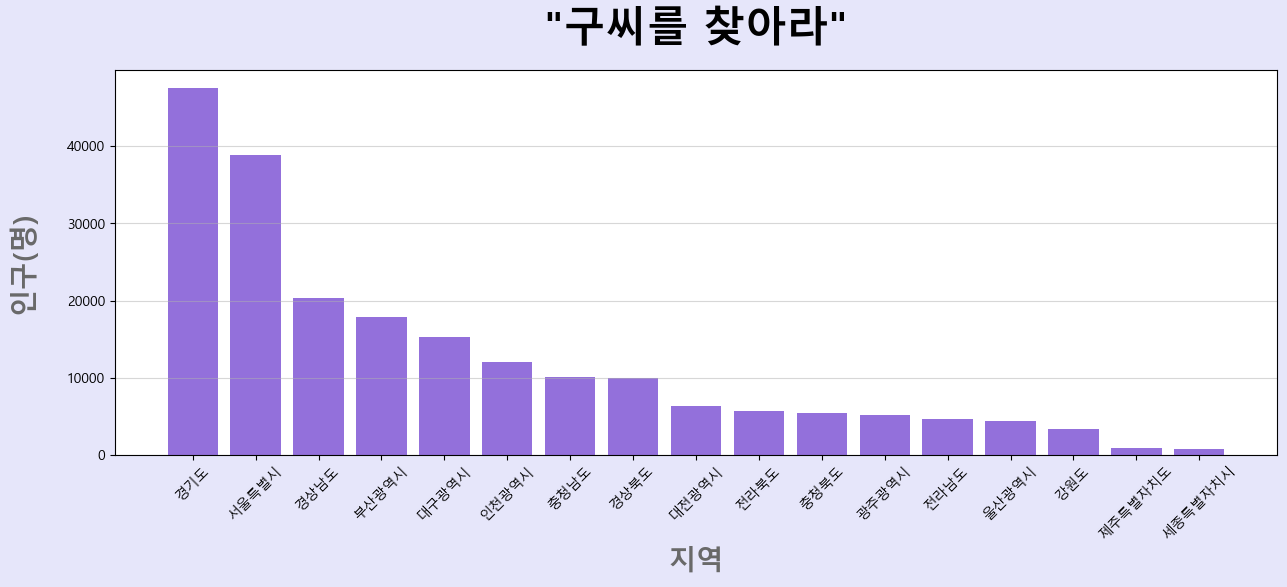

In [13]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 지정하기

# 1.그래프 데이터 지정하기(X축, Y축)
x = df_goo_group.index     # 지역
y = df_goo_group['인구']   # 인구수

# 2.그래프 그리기
plt.figure(figsize = (15, 5), facecolor = 'lavender') # 그래프 크기와 색상
plt.bar(x, y, color = 'mediumpurple')  # 막대 그래프 그리기

# 3. 그래프 꾸미기
plt.title('"구씨를 찾아라"', pad = 20,                # 그래프 제목
          fontdict = {'size':30, 'color':'black', 'weight':'bold'})
plt.xlabel('지역', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'})
plt.ylabel('인구(명)', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'}, labelpad = 20)
plt.xticks(rotation = 45)                   # X축 레이블 회전
plt.grid(True, axis = 'y', alpha = 0.5)    # 그래프에 그리드 표현하기

plt.show() # 그래프 그리기

#### #선 그래프로 시각화하기

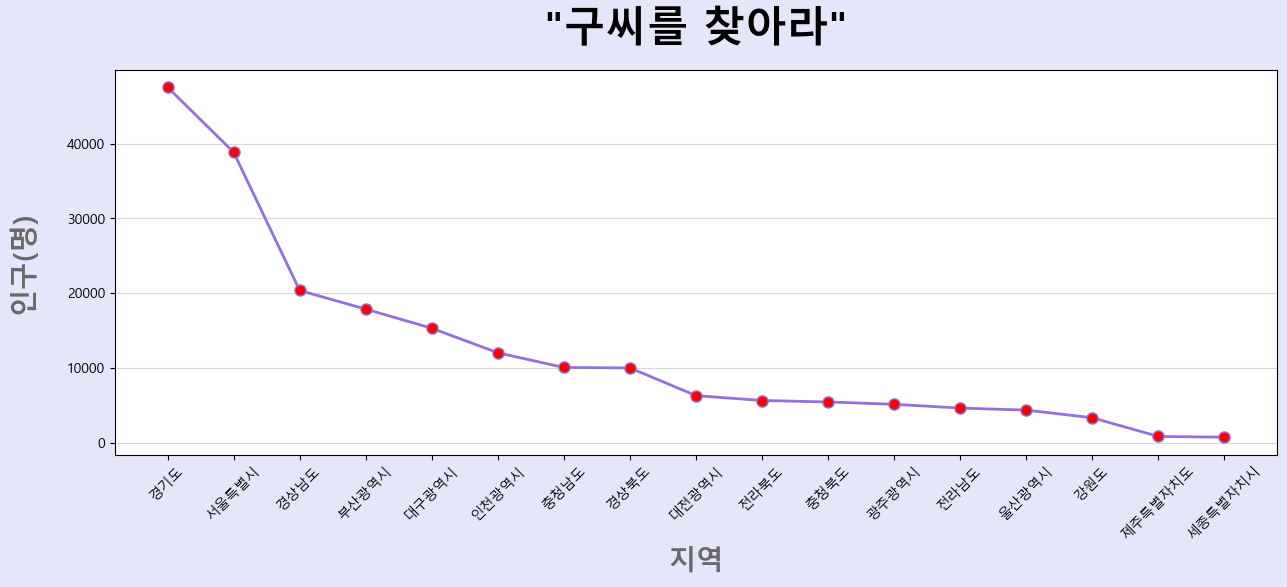

In [14]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 지정하기

# 1.그래프 데이터 지정하기(X축, Y축)
x = df_goo_group.index     # 지역
y = df_goo_group['인구']   # 인구수

# 2.그래프 그리기 (선그래프 그리기)
plt.figure(figsize = (15, 5), facecolor = 'lavender') # 그래프 크기와 색상
plt.plot(x, y, color='mediumpurple', marker='o', linestyle='solid',
         linewidth=2, markersize=8, markerfacecolor='red')

# 3. 그래프 꾸미기
plt.title('"구씨를 찾아라"', pad = 20,                # 그래프 제목
          fontdict = {'size':30, 'color':'black', 'weight':'bold'})
plt.xlabel('지역', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'})
plt.ylabel('인구(명)', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'}, labelpad = 20)
plt.xticks(rotation = 45)                   # X축 레이블 회전
plt.grid(True, axis = 'y', alpha = 0.5)    # 그래프에 그리드 표현하기

plt.show() # 그래프 그리기

#### 혼합 그래프

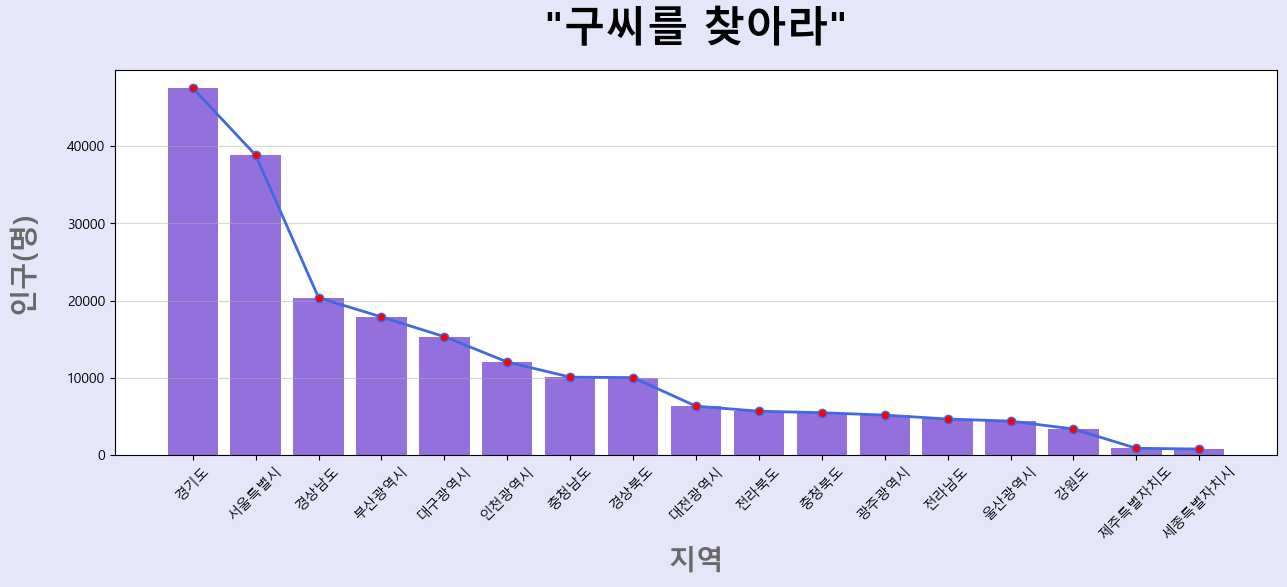

In [15]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 지정하기


# 1.그래프 데이터 지정하기(X축, Y축)
x = df_goo_group.index     # 지역
y = df_goo_group['인구']   # 인구수

# 2.그래프 그리기
plt.figure(figsize = (15, 5), facecolor = 'lavender') # 그래프 크기와 색상
plt.bar(x, y, color = 'mediumpurple')          # 막대 그래프
plt.plot(x, y, color='royalblue', marker='o',  # 선 그래프
         linewidth=2, markerfacecolor='red') 

# 3.그래프 꾸미기
plt.title('"구씨를 찾아라"', pad = 20,                # 그래프 제목
          fontdict = {'size':30, 'color':'black', 'weight':'bold'})
plt.xlabel('지역', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'})
plt.ylabel('인구(명)', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'}, labelpad = 20)
plt.xticks(rotation = 45)                 # X축 레이블 회전
plt.grid(True, axis = 'y', alpha = 0.5)  # 그래프에 그리드 표현하기

plt.show() # 그래프 그리기

### 5. 데이터 저장하기 : 데이터 파일로 저장하기

In [16]:
# 파일명 지정하여 저장하기
file = 'data/family_name_goo.csv'  # 파일명
df_goo_group.to_csv(file, encoding = 'cp949', mode = 'w') # 파일 저장하기

-----------------------------------------

## [미션] 
**자신의 성씨 데이터 지역별로 그룹핑해서 그래프로 나타내기**

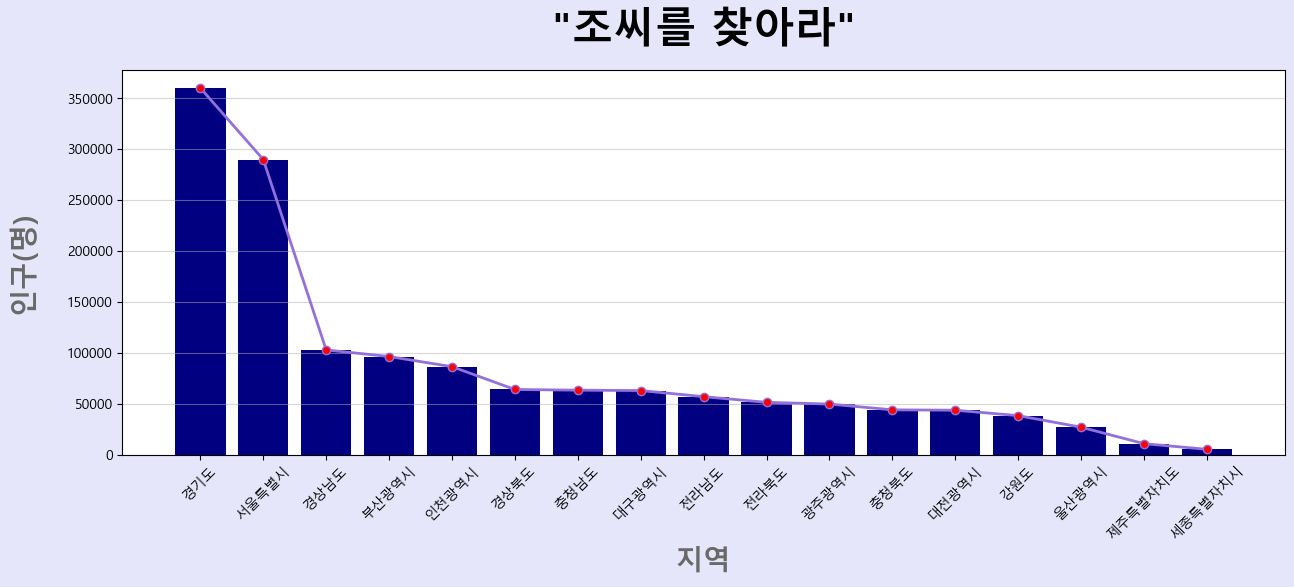

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

family_name = '조'

file = 'data/성씨ㆍ본관별_인구__시군구_20230102180807.csv'
df = pd.read_csv(file, encoding = 'cp949') #cp949: 윈도우OS 기본 인코딩 포맷

# 컬럼 이름 변경하기
df.columns = ['성씨', '지역', '인구']


#------------------------
# 자신의 성씨 데이터 지역별로 합계구하기
#------------------------
# '성씨'열에서 '조'가 포함되고, '지역'열에서 '전국' 제외하여 가져오기
df_my = df[df['성씨'].str.contains(family_name) & (df['지역'] != '전국')]

# 한자를 다르게 쓰는 '구'씨를 '지역'별로 합계 구하기
df_my_group = df_my.groupby('지역').sum(numeric_only=False)

# 지역별 합계 데이터를 '인구' 크기순으로 정렬하기
df_my_group = df_my_group.sort_values(by = '인구', ascending = False)


#------------------------
# 그래프 그리기
#------------------------
plt.rcParams['font.family'] = 'Malgun Gothic'

x = df_my_group.index    # 지역
y = df_my_group['인구']

plt.figure(figsize = (15, 5), facecolor = 'lavender')
plt.bar(x, y, color = 'navy') # 막대 그래프
plt.plot(x, y, color='mediumpurple', marker='o', linewidth=2, markerfacecolor='red') # 선 그래프

plt.title(f'"{family_name}씨를 찾아라"', fontdict = {'size': 30, 'color': 'black', 'weight': 'bold'}, pad = 20)

plt.xlabel('지역', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'})
plt.ylabel('인구(명)', fontdict = {'size': 20, 'color': 'dimgray', 'weight': 'bold'}, labelpad = 20)
plt.xticks(rotation = 45)
plt.grid(True, axis = 'y', alpha = 0.5)

plt.show()

### 라이브러리 설치하기 : 워드클라우드 

In [18]:
!pip install wordcloud

     ---------------------------------------- 0.0/153.1 kB ? eta -:--:--
     -------------------------------------- 153.1/153.1 kB 4.5 MB/s eta 0:00:00


### 지역별 인구수를 워드클라우드로 나타내기

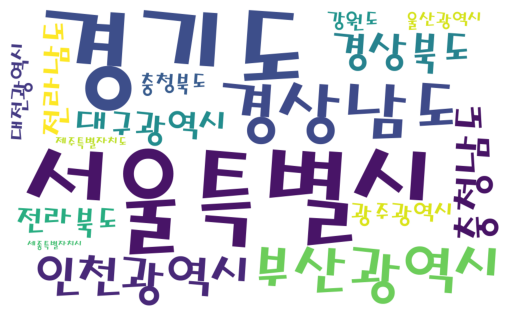

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1. 폰트 지정: 자신의 컴퓨터 환경에 맞는 한글 폰트 경로
font_path = 'malgun'  # C:/Windows/Fonts/
font_path = 'HMKMMAG' # C:/Windows/Fonts/HMKMMAG.TTF

# 2.전처리된 데이터 지정하기
names = df_my_group.index     # 지역
counts = df_my_group['인구']  # 인구수
data = dict(zip(names, counts)) # 워드클라우드는 딕셔너리 형태로 만들기

# 3.워드클라우드 그래프로 시각화하기
wc = WordCloud(width = 1000, height = 600, 
               background_color="white", font_path=font_path)
plt.imshow(wc.generate_from_frequencies(data))
plt.axis("off")
plt.show()

# 4.파일로 저장하기
wc.to_file('image/나의성씨_워드클라우드.png')

----------------------------------

THE END

## [퀴즈] 전국 성씨 순위구하기

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

family_name = '조'

file = 'data/성씨ㆍ본관별_인구__시군구_20230102180807.csv'
df = pd.read_csv(file, encoding = 'cp949') #cp949: 윈도우OS 기본 인코딩 포맷
df.columns = ['성씨', '지역', '인구']

df = df.query(" 지역 == '전국' and 성씨 != '계'")

# 성씨에서 한자 제외시키기 -----------
tmp1, tmp2, tmp3 = list(), list(), list()
for row in df.iterrows():
    tmp1.append(row[1]['성씨'].split('(')[0])
    tmp2.append(row[1]['지역'])
    tmp3.append(row[1]['인구'])
    
df_all = pd.DataFrame([ x for x in zip(tmp1,tmp2,tmp3)])
df_all.columns = df.columns
df_all
#-------------------------------------

# 한자를 다르게 쓰는 [성씨]를 [지역]별로 합계 구하기
df_all_group = df_all.groupby('성씨').sum(numeric_only=False)

# 지역별 합계 데이터를 '인구' 크기순으로 정렬하기
df_all_group = df_all_group.sort_values(by = '인구', ascending = False)

# 파일명 지정하여 저장하기
file = 'data/family_name_ranking.csv'  # 파일명
df_all_group.to_csv(file, encoding = 'cp949', mode = 'w') # 파일 저장하기

df_all_group.head(15)

,지역,인구
성씨,,
김,전국,10689959
이,전국,7306828
박,전국,4192074
정,전국전국전국,2407365
최,전국전국,2340509
조,전국전국,1453827
강,전국전국,1268472
윤,전국,1020547
장,전국전국전국,1019993


### 성씨 순위를 워드 클라우드로 만들기

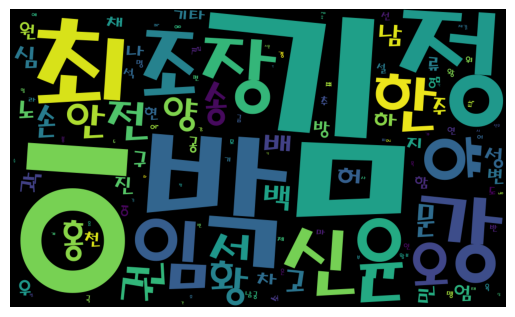

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = (10,6)

# 자신의 컴퓨터 환경에 맞는 한글 폰트 경로를 설정(window에서)
# font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'  # 코랩에서
font_path = 'malgun'  # C:/Windows/Fonts/
font_path = 'HMKMMAG' # C:/Windows/Fonts/HMKMMAG.TTF

# (토큰명, 빈도수) 딕셔너리 타입으로 변환
names = df_all_group.index.tolist()
counts = df_all_group['인구']

data = dict(zip(names, counts))

# 워드클라우드로 그래프로 시각화
wc = WordCloud(width = 1000, height = 600, background_color="black", font_path=font_path)
plt.imshow(wc.generate_from_frequencies(data))
plt.axis("off")
plt.show()

# 파일로 저장하기
wc.to_file('image/성씨_워드클라우드.png')